# Masking Demo

Use this to overlay a potential mask boundary onto a dash cam image, to see how it would align to an example image

In [1]:
subdir  = 'dashcam_tour_mount_eliza'
example = 'FILE210924-105212F_3252.png'

In [2]:
import os
import sys
import matplotlib.pylab as plt
import cv2
import numpy as np

module_path_root = os.path.abspath(os.pardir)
if module_path_root not in sys.path:
    sys.path.append(module_path_root)

In [3]:
example_image = os.path.join(module_path_root, 'data_sources', subdir, 'split', example)

1080
1920


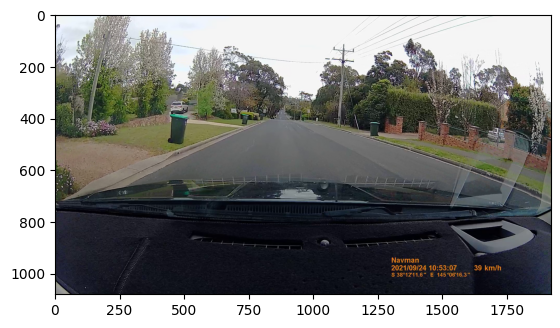

In [4]:
original_image = cv2.imread(example_image)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

height = original_image.shape[0]
width = original_image.shape[1]

print(height)
print(width)
plt.imshow(original_image)
plt.show()

In [11]:
vertices = np.array([
    [0, 0],
    [0, 720],
    [480, 650],
    [950, 650],
    [950, 0]
])

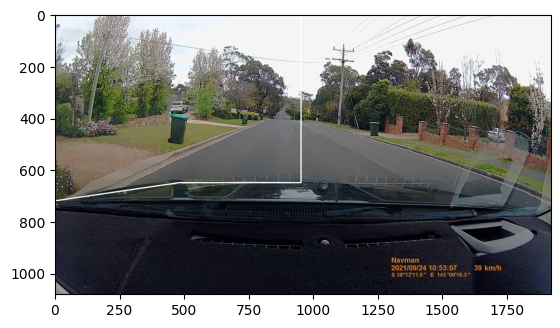

In [12]:
line_image = np.copy(original_image)

for i in range(len(vertices)-1):
    cv2.line(line_image, vertices[i], vertices[i+1], (255, 255, 255), thickness=3)
    
plt.imshow(line_image)
plt.show()

In [ ]:
mask = np.zeros_like(original_image)
channel_count = original_image.shape[2]
match_mask_color = (255,) * channel_count
cv2.fillPoly(mask, np.int32([vertices]), match_mask_color)

masked_image = cv2.bitwise_and(original_image, mask)

plt.imshow(masked_image)
plt.show()